# **Decision Trees**

## Objectives
* Develop a classification model using Decision Tree Algorithm
* Apply Decision Tree classification on a real world dataset

## Introduction
This lab explores decision trees classification, a powerful machine learning technique for making data-driven decisions. We will learn to build, visualize, and evaluate decision tree using a real-world dataset. The dataset used in this lab is that of Drug prediction based on the health parameters of a patient.

### Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### About Dataset

Imagine that we are medical researcher compiling data for a study. We have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

Part of our job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and we can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.

In [74]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
data = pd.read_csv(path)
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Analysis and Preprocessing
We should apply some basic analytics steps to understand the data better. First, let us gather some basic information about the dataset.

In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


This tells us that 4 out of the 6 feature are categorical, which will have to be encoded for modeling purposes. For this, we can make use of `LabelEncoder` from the scikit-learn library.

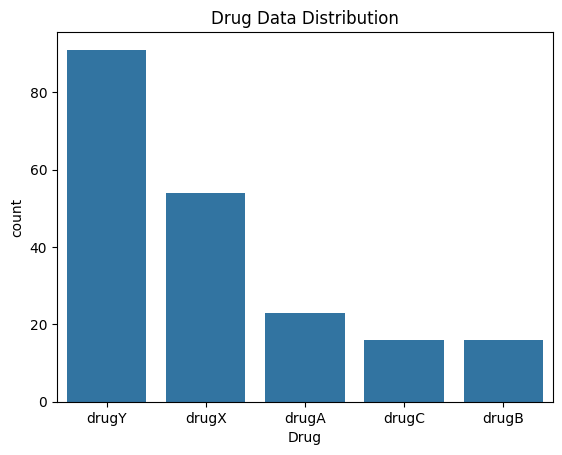

In [76]:
order = data['Drug'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Drug'], order=order)
plt.title("Drug Data Distribution")
plt.show()

This Clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.

In [77]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# Scaling numerical cols
num_cols = ['Age', 'Na_to_K']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out(num_cols))
scaled_df = pd.concat([data.drop(columns=num_cols), scaled_df], axis=1)

# Encode binary column
scaled_df['Sex'] = scaled_df['Sex'].map({'F': 0, 'M': 1})

# Encode Ordinal columns
ordinal_order = [
    ['LOW', 'NORMAL', 'HIGH'],   # BP order
    ['NORMAL', 'HIGH']  # Cholestrol order
]
encoder = OrdinalEncoder(categories=ordinal_order)
encoded_data = encoder.fit_transform(scaled_df[['BP', 'Cholesterol']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['BP', 'Cholesterol']))

# Encode Target
lb_encoder = LabelEncoder()
scaled_df['Drug'] = lb_encoder.fit_transform(scaled_df['Drug'])

# Concat dataframe
df_final = pd.concat([scaled_df.drop(columns=['BP', 'Cholesterol']), encoded_df], axis=1)

In [78]:
df_final.corr()['Drug'].sort_values(ascending=False)

Drug           1.000000
Na_to_K        0.589120
Age           -0.004828
Cholesterol   -0.055629
Sex           -0.098573
BP            -0.328665
Name: Drug, dtype: float64

---

### Modeling

For modeling this dataset with a Decision tree classifier, we first split the dataset into training and testing subsets. For this, we seperate the target variable from the input variables.

In [79]:
X = df_final.drop(columns=['Drug'])
y = df_final['Drug']

Now, use the `train_test_split()` function to seperate the training data from the testing data. We can make use of 30% of the data for testing and the rest for training the Decision Tree.

In [80]:
from sklearn.model_selection import train_test_split

# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Now we can define the Decision Tree classifier as `drugtree` and train it with the training data.

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the model
drugtree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Evaluation
Now that you have trained the decision tree, we can use it to generate the predictions on the test set.

In [89]:
from sklearn.metrics import accuracy_score

# Predict using the model 
y_pred = drugtree.predict(X_test)

# Evaluate
print(f"Decision Tree's Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Decision Tree's Accuracy: 98.33%


This means that the model was able to correctly identify the labels of 98.33%, i.e. 59 out of 60 test samples.

#### Visualize the tree
To understand the classification criteria derived by the Decision Tree, we may generate the tree plot

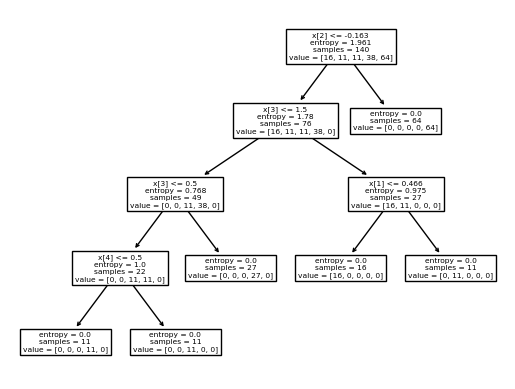

In [90]:
plot_tree(drugtree)
plt.show()

From this tree, we can derive the criteria developed by the model to identify the class of each training sample. We can interpret them by tracing the criteria defined by tracing down from the root to the tree's leaf nodes.

For instance, the decision criterion for *Drug Y* is ${Na\_to\_K} \gt 14,627$.

Drug A : $Na\_to\_K <= 14.627,\ BP = High,\ Age <= 50.5$<br>
Drug B : $Na\_to\_K <= 14.627,\ BP = High,\ Age > 50.5$<br>
Drug C : $Na\_to\_K <= 14.627,\ BP = Low,\ Cholesterol <= High$<br>
Drug X : $Na\_to\_K <= 14.627,\ BP = Normal,\ Cholesterol = High$

In [92]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_train,y_train)
tree_predictions = drugTree.predict(X_test)
print(f"Decision Trees's Accuracy: {accuracy_score(y_test, tree_predictions):.2%}")

Decision Trees's Accuracy: 86.67%
